<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


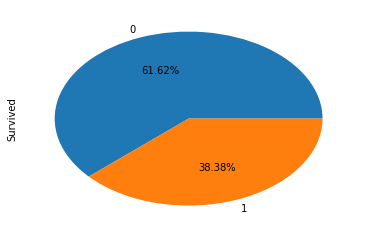

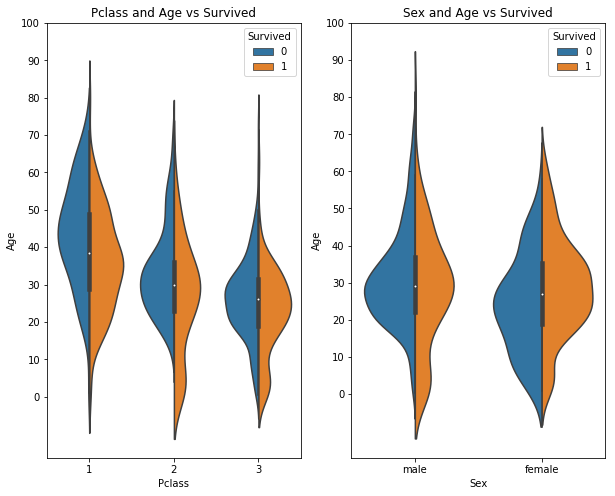

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
train_data= pd.read_csv('C:\\input\\train.csv')
test_data = pd.read_csv('C:\\input\\test.csv')

train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

train_data['Embarked'] = train_data.Embarked.fillna('S')

train_data['Cabin'] = train_data.Cabin.fillna('U0')

from sklearn.ensemble import RandomForestRegressor
age_df = train_data[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

age_df_notnull = age_df[age_df['Age'].notnull()]
age_df_isnull = age_df[age_df['Age'].isnull()]

X = age_df_notnull.drop(['Age'],axis=1)
Y = age_df_notnull['Age']

RER = RandomForestRegressor(n_estimators=1000,n_jobs=-1)
RER.fit(X,Y)

predictAges = RER.predict(age_df_isnull.drop(['Age'],axis=1))
train_data.loc[train_data['Age'].isnull(),'Age']=predictAges
train_data.info()


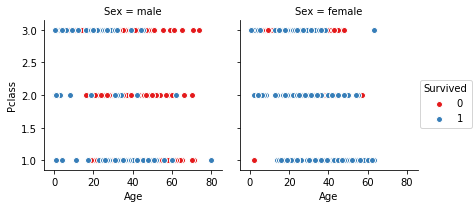

In [2]:
g = sns.FacetGrid(train_data, col="Sex", hue="Survived", palette="Set1")
g.map(plt.scatter, "Age", "Pclass",edgecolor="w")
g.add_legend()

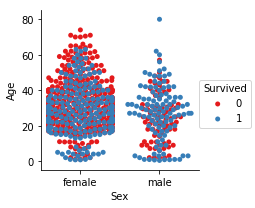

In [42]:
g = sns.FacetGrid(train_data, hue='Survived',palette="Set1")
g = g.map(sns.swarmplot, 'Sex', 'Age')
g.add_legend()

In [7]:
train_data.groupby(['Sex','Survived'])['Survived'].count()  #將資料依照自己要的column分組

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

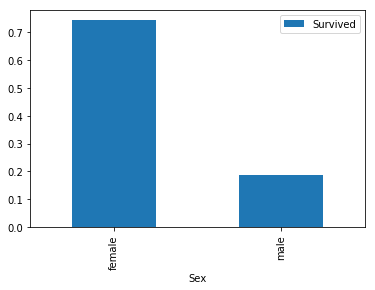

In [8]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

In [9]:
train_data.groupby(['Pclass','Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

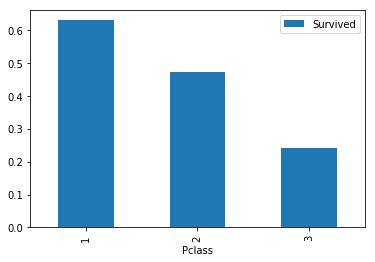

In [10]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

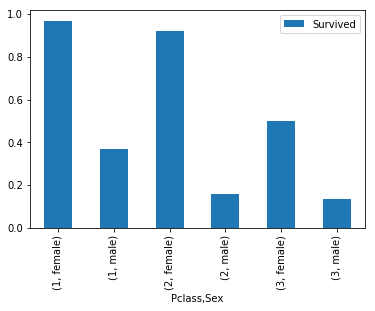

In [11]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

In [12]:
train_data.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

In [1]:
fig, ax = plt.subplots(1, 2, figsize = (10, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train_data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=train_data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

NameError: name 'plt' is not defined

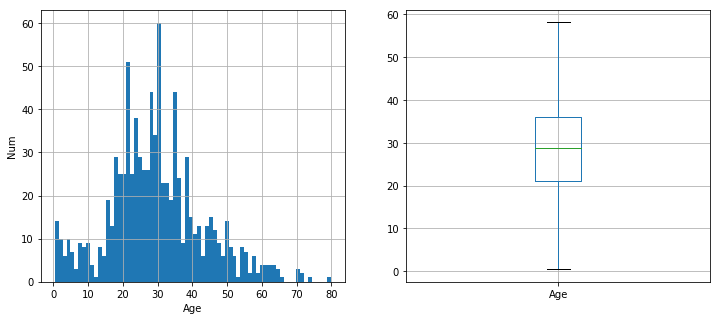

In [83]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
train_data.boxplot(column='Age', showfliers=False)
plt.show()

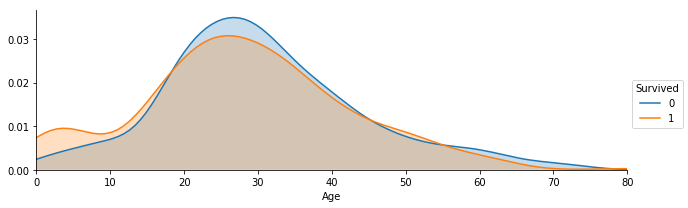

In [44]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

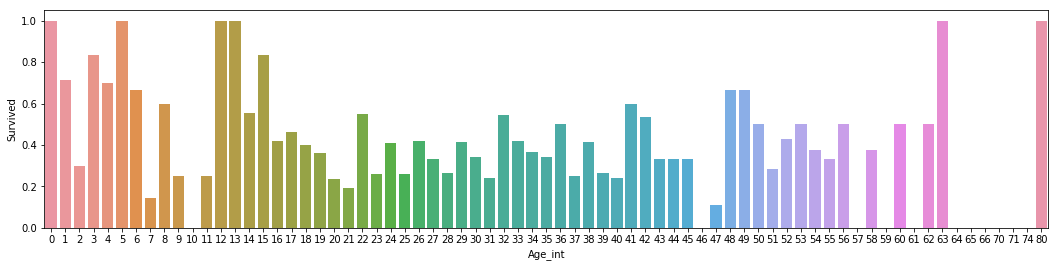

In [48]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4)) #建立窗口,並設定大小
train_data["Age_int"] = train_data["Age"].astype(int)
average_age = train_data[["Age_int", "Survived"]].groupby(['Age_int'],as_index=False).mean()
sns.barplot(x='Age_int', y='Survived', data=average_age)

In [22]:
train_data['Age'].describe()

count    891.000000
mean      29.655026
std       13.734832
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
bins = [0, 12, 18, 65, 100]
train_data['Age_group'] = pd.cut(train_data['Age'], bins)
by_age = train_data.groupby('Age_group')['Survived'].mean()
by_age

Age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64

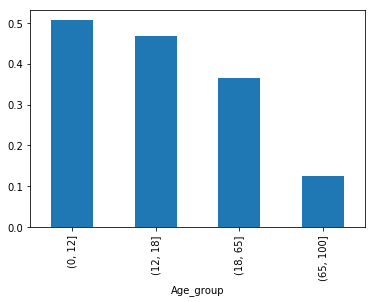

In [24]:
by_age.plot(kind = 'bar')

In [25]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)  #抽取匹配的字符串出來，注意要加上括號
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


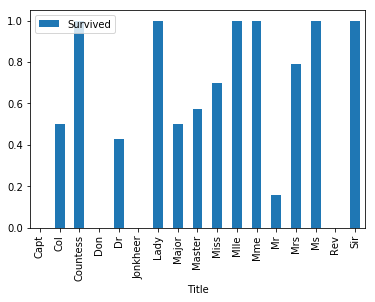

In [26]:
train_data[['Title','Survived']].groupby(['Title']).mean().plot.bar()

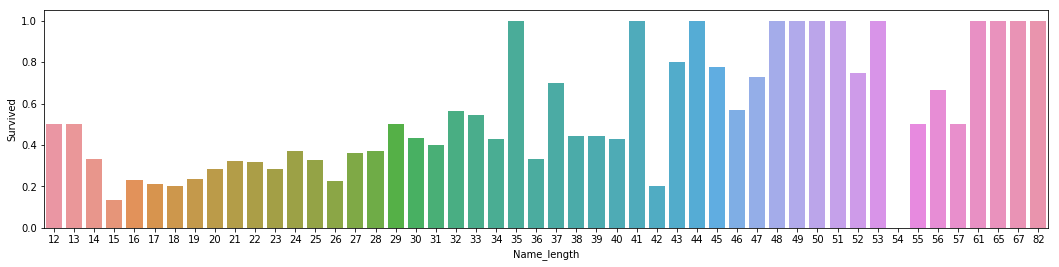

In [27]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['Name_length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_length','Survived']].groupby(['Name_length'],as_index=False).mean()
sns.barplot(x='Name_length', y='Survived', data=name_length)

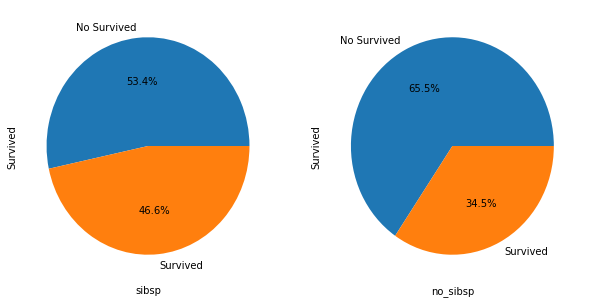

In [95]:
sibsp_df = train_data[train_data['SibSp'] != 0]   #有無兄弟姐妹
no_sibsp_df = train_data[train_data['SibSp'] == 0]
plt.figure(figsize=(10,5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%') #圓餅圖
plt.xlabel('sibsp')

plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_sibsp')

plt.show()

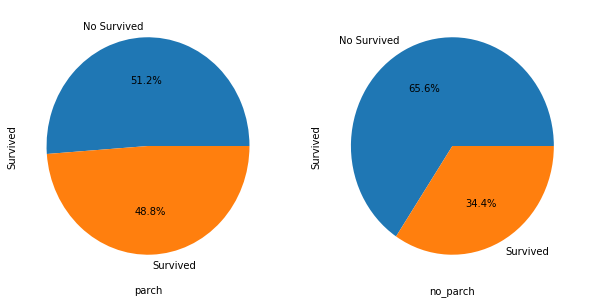

In [29]:
parch_df = train_data[train_data['Parch'] != 0]  #有無父母子女
no_parch_df = train_data[train_data['Parch'] == 0]

plt.figure(figsize=(10,5))
plt.subplot(121)
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('parch')

plt.subplot(122)
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_parch')

plt.show()

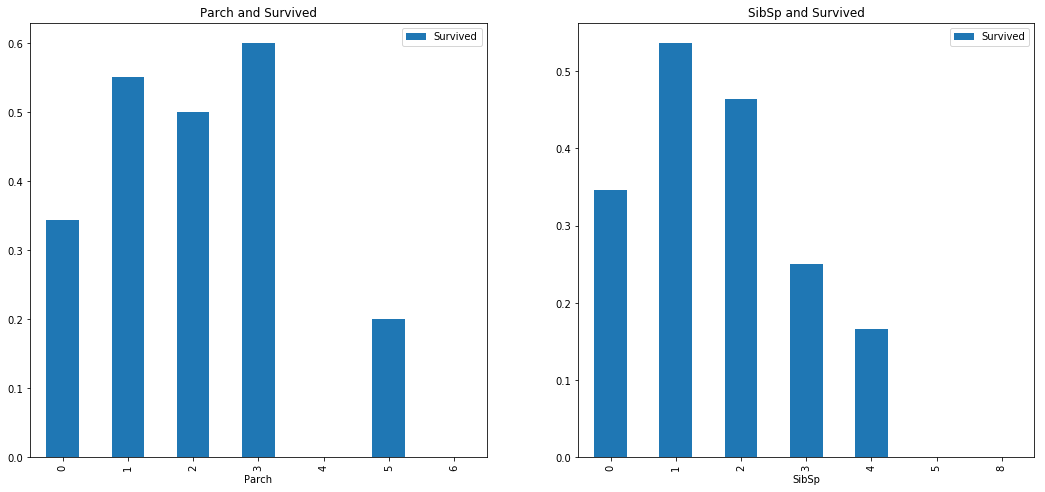

In [103]:
fig,ax=plt.subplots(1,2,figsize=(18,8)) #一行兩列
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')

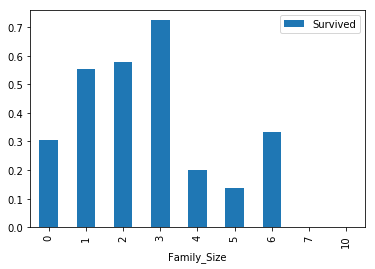

In [108]:
train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp']
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()

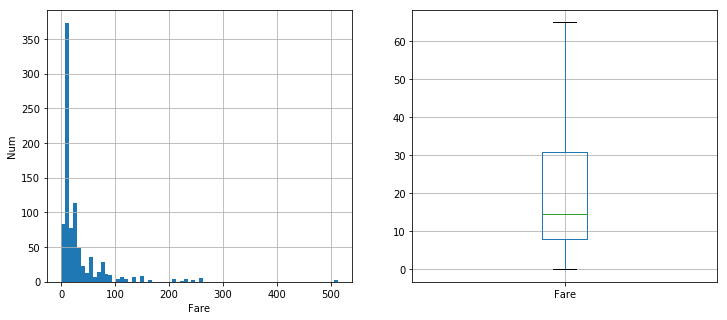

In [87]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Fare'].hist(bins=70)
plt.xlabel('Fare')
plt.ylabel('Num')

plt.subplot(122)
train_data.boxplot(column='Fare', showfliers=False)
plt.show()


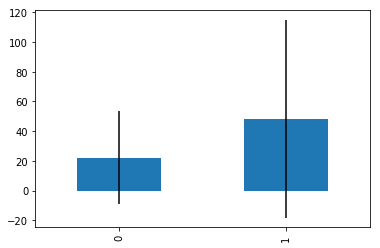

In [62]:
fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])  #DataFrame 用來處理結構化(Table like)的資料
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
average_fare.plot(yerr=std_fare, kind='bar', legend=False)

plt.show()

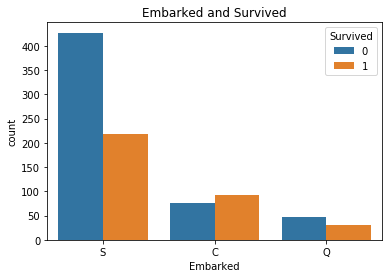

In [34]:
sns.countplot('Embarked', hue='Survived', data=train_data)
plt.title('Embarked and Survived')

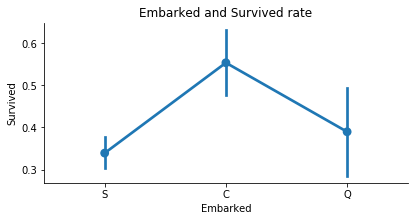

In [89]:
sns.factorplot('Embarked', 'Survived', data=train_data, size=3, aspect=2)
plt.title('Embarked and Survived rate')
plt.show()

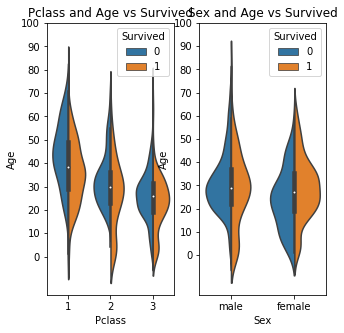

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (5, 5))
sns.violinplot("Pclass", "Age", hue="Survived", data=train_data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=train_data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()